In [28]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [29]:
df = pd.read_csv("mars_radiation_prediction.csv")

In [37]:
# Define features (normalized inputs) and target
features = [
    "pressure_norm",
    "EPITHERMAL_FLUX1_norm",
    "FAST_FLUX1_norm",
    "stormy_days_normalized",
    "elevation_m"
]
target = "predicted_dose_e"

In [32]:
# Prepare inputs (X) and output (y)
X = df[features]
y = df[target]

In [33]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
# Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

In [36]:
# Print model coefficients and R²
print("Coefficients of model:")
for name, coef in zip(features, model.coef_):
    print(f"{name:25s}: {coef:.4f}")

print(f"\nR² on test: {r2:.3f}")

Coefficients of model:
pressure_norm            : -0.2110
EPITHERMAL_FLUX1_norm    : 0.0475
FAST_FLUX1_norm          : -0.0111
stormy_days_normalized   : 0.0036
elevation_m              : -0.0000

R² on test: 0.677


In [39]:
df["elev_bin"] = pd.cut(df["elevation_m"], bins=range(-8000, 22000, 1000))

In [40]:
grouped = df.groupby("elev_bin")[["predicted_dose_e"]].mean().reset_index()

C:\Users\marke\AppData\Local\Temp\ipykernel_11980\3024852776.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby("elev_bin")[["predicted_dose_e"]].mean().reset_index()


C:\Users\marke\AppData\Local\Temp\ipykernel_11980\3497698858.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="elev_bin", y="predicted_dose_e", data=grouped, palette="viridis")
C:\Users\marke\AppData\Local\Temp\ipykernel_11980\3497698858.py:9: UserWarning: Glyph 129680 (\N{RINGED PLANET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\marke\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129680 (\N{RINGED PLANET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


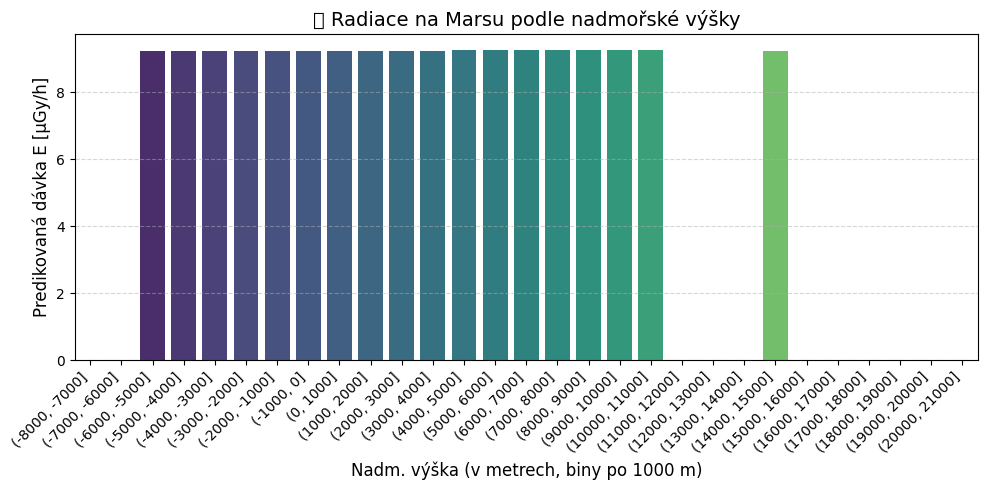

In [41]:
plt.figure(figsize=(10, 5))
sns.barplot(x="elev_bin", y="predicted_dose_e", data=grouped, palette="viridis")

plt.xticks(rotation=45, ha="right")
plt.xlabel("Nadm. výška (v metrech, biny po 1000 m)", fontsize=12)
plt.ylabel("Predikovaná dávka E [µGy/h]", fontsize=12)
plt.title("🪐 Radiace na Marsu podle nadmořské výšky", fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()